In [1]:
# Improve by ChatGPT & GitHub Copilot
# Running the requierements.ipynb
%run /bettik/PROJECTS/pr-data-ocean/riverama/Notebooks/OSSE_generator/requierements.ipynb

In [2]:
# Loading datasets
DAC_prueba = xr.open_mfdataset("/bettik/PROJECTS/pr-data-ocean/riverama/Datos/DAC_marco/dac_dif_23376_00.nc")

In [3]:
DAC_prueba

<xarray.Dataset> Size: 4MB
Dimensions:    (latitude: 721, longitude: 1440)
Coordinates:
  * latitude   (latitude) float64 6kB -90.0 -89.75 -89.5 ... 89.5 89.75 90.0
  * longitude  (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
Data variables:
    dac        (latitude, longitude) float32 4MB dask.array<chunksize=(721, 1440), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.4
    title:        MOG2D-G HR barotropic model output (high frequencies) combi...
    institution:  CNES/CNRS-LEGOS/CLS
    source:       MOG2D-G(Pressure+Wind)+Inverted Barometer, system version 3...
    history:      no
    references:   http://www.aviso.oceanobs.com
    comment:      Low Frequencies/High Frequencies:20 day cutoff

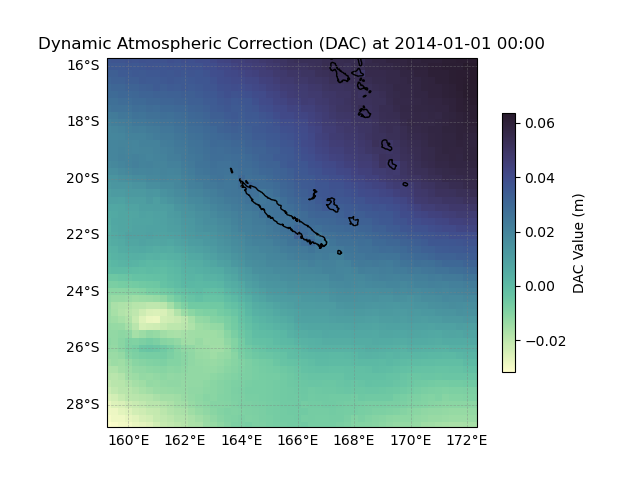

In [4]:
# Define the geographic domain
lon_min, lon_max = 159.23333740234375, 172.34999084472656
lat_min, lat_max = -28.803945541381836, -15.699763298034668

# Define the projection
projection = ccrs.PlateCarree()

# Create a plot with the specified projection
fig, ax = plt.subplots(subplot_kw={'projection': projection})

# Set the extent of the plot to match the specified domain
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Add geographical features for context
ax.add_feature(cfeature.LAND.with_scale('10m'), edgecolor='black')  # Add land with higher resolution
ax.add_feature(cfeature.COASTLINE.with_scale('10m'))  # Add coastline with higher resolution
ax.add_feature(cfeature.OCEAN.with_scale('10m'))  # Add ocean with higher resolution
ax.add_feature(cfeature.BORDERS.with_scale('10m'), linestyle=':')  # Add borders with higher resolution

# Optional: Add gridlines and labels for clarity
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False  # Disable labels at the top
gl.right_labels = False  # Disable labels on the right

# Slice the dataset to the specified domain
dac_sliced = DAC_prueba.sel(longitude=slice(lon_min, lon_max), latitude=slice(lat_min, lat_max))

# Extract the DAC data and get the latitude and longitude for plotting
latitude = dac_sliced['latitude'].values
longitude = dac_sliced['longitude'].values
dac_data = dac_sliced['dac'].values

# Create meshgrid for plotting
lon, lat = np.meshgrid(longitude, latitude)

# Plotting the DAC data
dac_plot = ax.pcolormesh(lon, lat, dac_data, transform=ccrs.PlateCarree(), cmap=cmocean.cm.deep)

# Adding a colorbar
plt.colorbar(dac_plot, ax=ax, orientation='vertical', label='DAC Value (m)',shrink=0.7)

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Dynamic Atmospheric Correction (DAC) at 2014-01-01 00:00')
ax.set_aspect('equal', adjustable='box')
plt.show()


In [10]:
SSH_01 = xr.open_dataset('/bettik/PROJECTS/pr-data-ocean/riverama/Datos/CALEDO60/CALEDO60-TRPC12NT0_y2014m01d01-d31.1h_SSH.nc')

In [14]:
dac_interpolated

<xarray.Dataset>
Dimensions:    (y: 853, x: 788)
Coordinates:
    latitude   (y, x) float32 -28.8 -28.8 -28.8 -28.8 ... -15.7 -15.7 -15.7
    longitude  (y, x) float32 159.2 159.2 159.3 159.3 ... 172.3 172.3 172.3
    nav_lat    (y, x) float32 -28.8 -28.8 -28.8 -28.8 ... -15.7 -15.7 -15.7
    nav_lon    (y, x) float32 159.2 159.2 159.3 159.3 ... 172.3 172.3 172.3
Dimensions without coordinates: y, x
Data variables:
    dac        (y, x) float64 -0.03172 -0.03169 -0.03163 ... 0.06253 0.0626
Attributes:
    Conventions:  CF-1.4
    title:        MOG2D-G HR barotropic model output (high frequencies) combi...
    institution:  CNES/CNRS-LEGOS/CLS
    source:       MOG2D-G(Pressure+Wind)+Inverted Barometer, system version 3...
    history:      no
    references:   http://www.aviso.oceanobs.com
    comment:      Low Frequencies/High Frequencies:20 day cutoff